# **QSAR Model Building of Malaria DHODH**


# Read in data

In [6]:
import pandas as pd

In [7]:
dataset_url = r'C:\Users\Bhanu\Desktop\MALARIA_DHODH\trial_2\pf_DHODH_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.370590
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.845880
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.029653
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.813892
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
547,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
548,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
549,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060


In [8]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
547,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
548,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
549,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y = dataset.iloc[:,-1]
Y

0      4.370590
1      3.845880
2      4.029653
3      3.813892
4      3.698970
         ...   
546    3.602060
547    3.602060
548    3.602060
549    3.602060
550    8.000000
Name: pIC50, Length: 551, dtype: float64

# Remove low variance features

In [10]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,...,PubchemFP710,PubchemFP712,PubchemFP716,PubchemFP737,PubchemFP755,PubchemFP770,PubchemFP779,PubchemFP800,PubchemFP818,PubchemFP833
0,0,0,1,0,1,1,1,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
3,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,0,1,0,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.to_csv('descriptor_list.csv', index = False)

In [12]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.831752369176235

## Model Prediction

In [15]:
Y_pred = model.predict(X)
Y_pred

array([4.35067686, 4.0042799 , 4.302942  , 4.0042799 , 3.73679171,
       3.73679171, 6.71518361, 4.12928103, 5.53554639, 5.56679741,
       5.19557729, 4.56825757, 3.99240483, 3.53837544, 3.88199536,
       4.23161588, 4.28285668, 4.91327818, 5.61527827, 5.04087782,
       4.66622828, 4.66622828, 4.59269269, 5.65082195, 5.04087782,
       5.47188082, 5.02126847, 5.65082195, 4.66622828, 6.48219323,
       5.66721411, 6.42604454, 5.54171716, 6.07703599, 5.4785761 ,
       5.41582959, 4.68299395, 4.68299395, 4.68299395, 4.53089683,
       4.68299395, 4.68299395, 4.68299395, 4.68299395, 4.48548541,
       4.68299395, 4.54015629, 4.68299395, 4.68299395, 4.54260828,
       5.4093279 , 5.67231648, 5.96881406, 5.47188082, 6.25499683,
       5.96881406, 6.44116441, 5.65082195, 4.54015629, 6.48219323,
       6.41416296, 4.73338204, 4.92388295, 5.5431341 , 6.03510702,
       5.95212459, 5.73620808, 4.58237754, 4.6277629 , 6.41416296,
       6.29923488, 6.41416296, 6.25435642, 5.44129036, 4.91288

## Model Performance

In [16]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.23
Coefficient of determination (R^2): 0.83


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

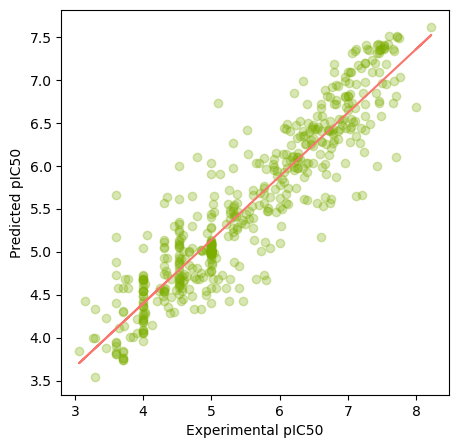

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [21]:
import pickle

In [22]:
pickle.dump(model, open('pf_DHODH_model.pkl', 'wb'))